In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from skimage import io

In [3]:
os.getcwd()

'F:\\python\\EveryDayCoding\\ComputerVision\\TheBasic'

In [4]:
image1 = cv2.imread(fr"{os.getcwd()}\dataset\ayam4.jpg")
image2 = cv2.imread(fr"{os.getcwd()}\dataset\ayam10.jpg")

In [5]:
imageGray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

In [6]:
cv2.imshow("kamera",imageGray)
cv2.waitKey(0)
cv2.destroyAllWindows()
# cv2.imwrite("../dataset/ayamGray.jpg",imageGray)

# Try SIFT Alghoritm for find similarity

In [7]:
image1Gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2Gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [8]:
sift = cv2.xfeatures2d.SIFT_create()
keyPoint_image1, descriptor_image1 = sift.detectAndCompute(image1Gray, None)
keyPoint_image2, descriptor_image2 = sift.detectAndCompute(image2Gray, None)


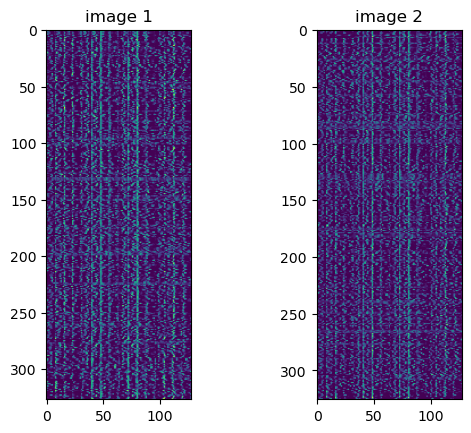

In [9]:
plt.subplot(1, 2 ,1)
plt.title('image 1')
plt.imshow(descriptor_image1)

plt.subplot(1, 2, 2)
plt.title('image 2')
plt.imshow(descriptor_image2)


In [10]:
img1Sift = cv2.drawKeypoints(image1, keyPoint_image1, image1Gray)
img2Sift = cv2.drawKeypoints(image2, keyPoint_image2, image2Gray)

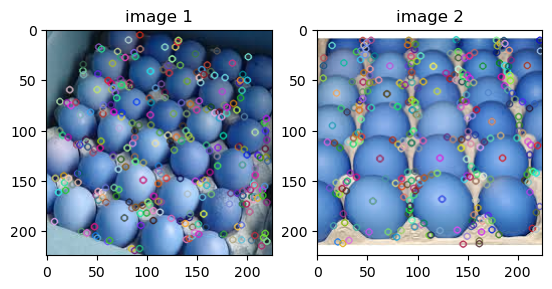

In [11]:
plt.subplot(1, 2, 1)
plt.title('image 1')
plt.imshow(img1Sift)

plt.subplot(1, 2, 2)
plt.title('image 2')
plt.imshow(img2Sift)


In [12]:
norm = cv2.NORM_L2

bruteForce = cv2.BFMatcher(norm)

matches = bruteForce.match(descriptor_image1, descriptor_image2)
matches = sorted(matches, key= lambda match : match.distance)

In [14]:
matches_img = cv2.drawMatches(
    image1, keyPoint_image1,
    image2, keyPoint_image2,
    matches[:20], image2.copy())


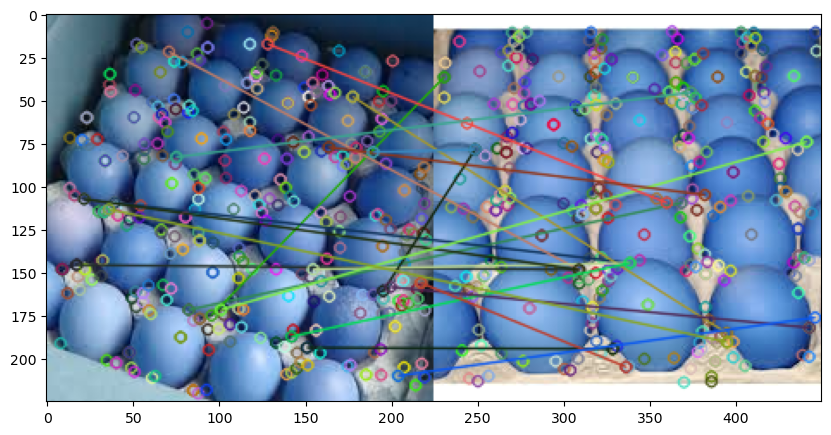

In [18]:
plt.figure(figsize=(10, 20))
plt.imshow(matches_img)

# Briefly the code in function below

In [19]:
def extractSiftFeature(image):
    siftInisialize = cv2.xfeatures2d.SIFT_create()
    keyPoints, descriptors = siftInisialize.detectAndCompute(img, None)
    return keyPoints, descriptors

def showSiftFeatures(image1, image2, keyPoints):
    return plt.imshow(cv2.drawKeypoints(image1, keyPoints, image2.copy()))